In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


from tensorflow.keras.datasets import imdb
from tensorflow.keras import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers, regularizers

In [16]:
vocabulary_size = 20000 # my unique words
sequence_length = 90 # hyperparameter - we take 20 words 

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocabulary_size)



x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=sequence_length)
x_test = preprocessing.sequence.pad_sequences(x_train, maxlen=sequence_length)


split_index = int(0.8 * len(x_train))
imdb_train = tf.data.Dataset.from_tensor_slices(
    (x_train[:split_index], y_train[:split_index])

).cache()

imdb_validate = tf.data.Dataset.from_tensor_slices(
    (x_train[split_index:], y_train[split_index:])

).cache()


imdb_test = tf.data.Dataset.from_tensor_slices(
    (x_test, y_test)
).cache()

In [17]:
embedding_size = 8

model = models.Sequential()

model.add(layers.Embedding(vocabulary_size, embedding_size, input_length=sequence_length))

#option 1.
#model.add(layers.LSTM(32))

#option 2.
#model.add(layers.LSTM(64, return_sequences=True))
#model.add(layers.LSTM(32))

#option 3.
model.add(layers.Bidirectional(layers.LSTM(32)))

model.add(layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.011)))

model.summary()

model.summary()

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"] 
)

history = model.fit(
    imdb_train.shuffle(10000).batch(32), # pipeline; batch - too high - memory will explode and overfitting; too low - slow
    epochs=5,
    validation_data=imdb_validate.batch(32)
)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 90, 8)             160000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                10496     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 170,561
Trainable params: 170,561
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 90, 8)             160000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                10496     
__________________________

In [8]:
def plot_history(history):
    plt.plot(history.history["loss"], label=['loss'])
    plt.plot(history.history["val_loss"], label=['val_loss'])
    plt.legend()
    plt.show()
    plt.close()
    
    
    plt.plot(history.history["accuracy"], label=['accuracy'])
    plt.plot(history.history["val_accuracy"], label=['val_accuracy'])
    plt.legend()
    plt.show()
    plt.close()

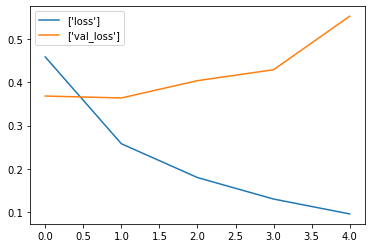

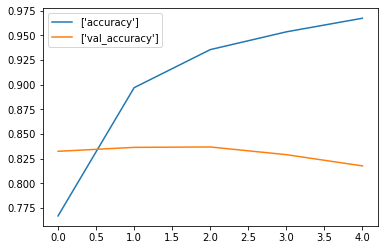

In [13]:
plot_history(history)